In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset= pd.read_csv('/content/Housing.csv')

In [4]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
#checking if any  null values
print(dataset.isnull().any())

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool


In [7]:
#checking for categorical data
print(dataset.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


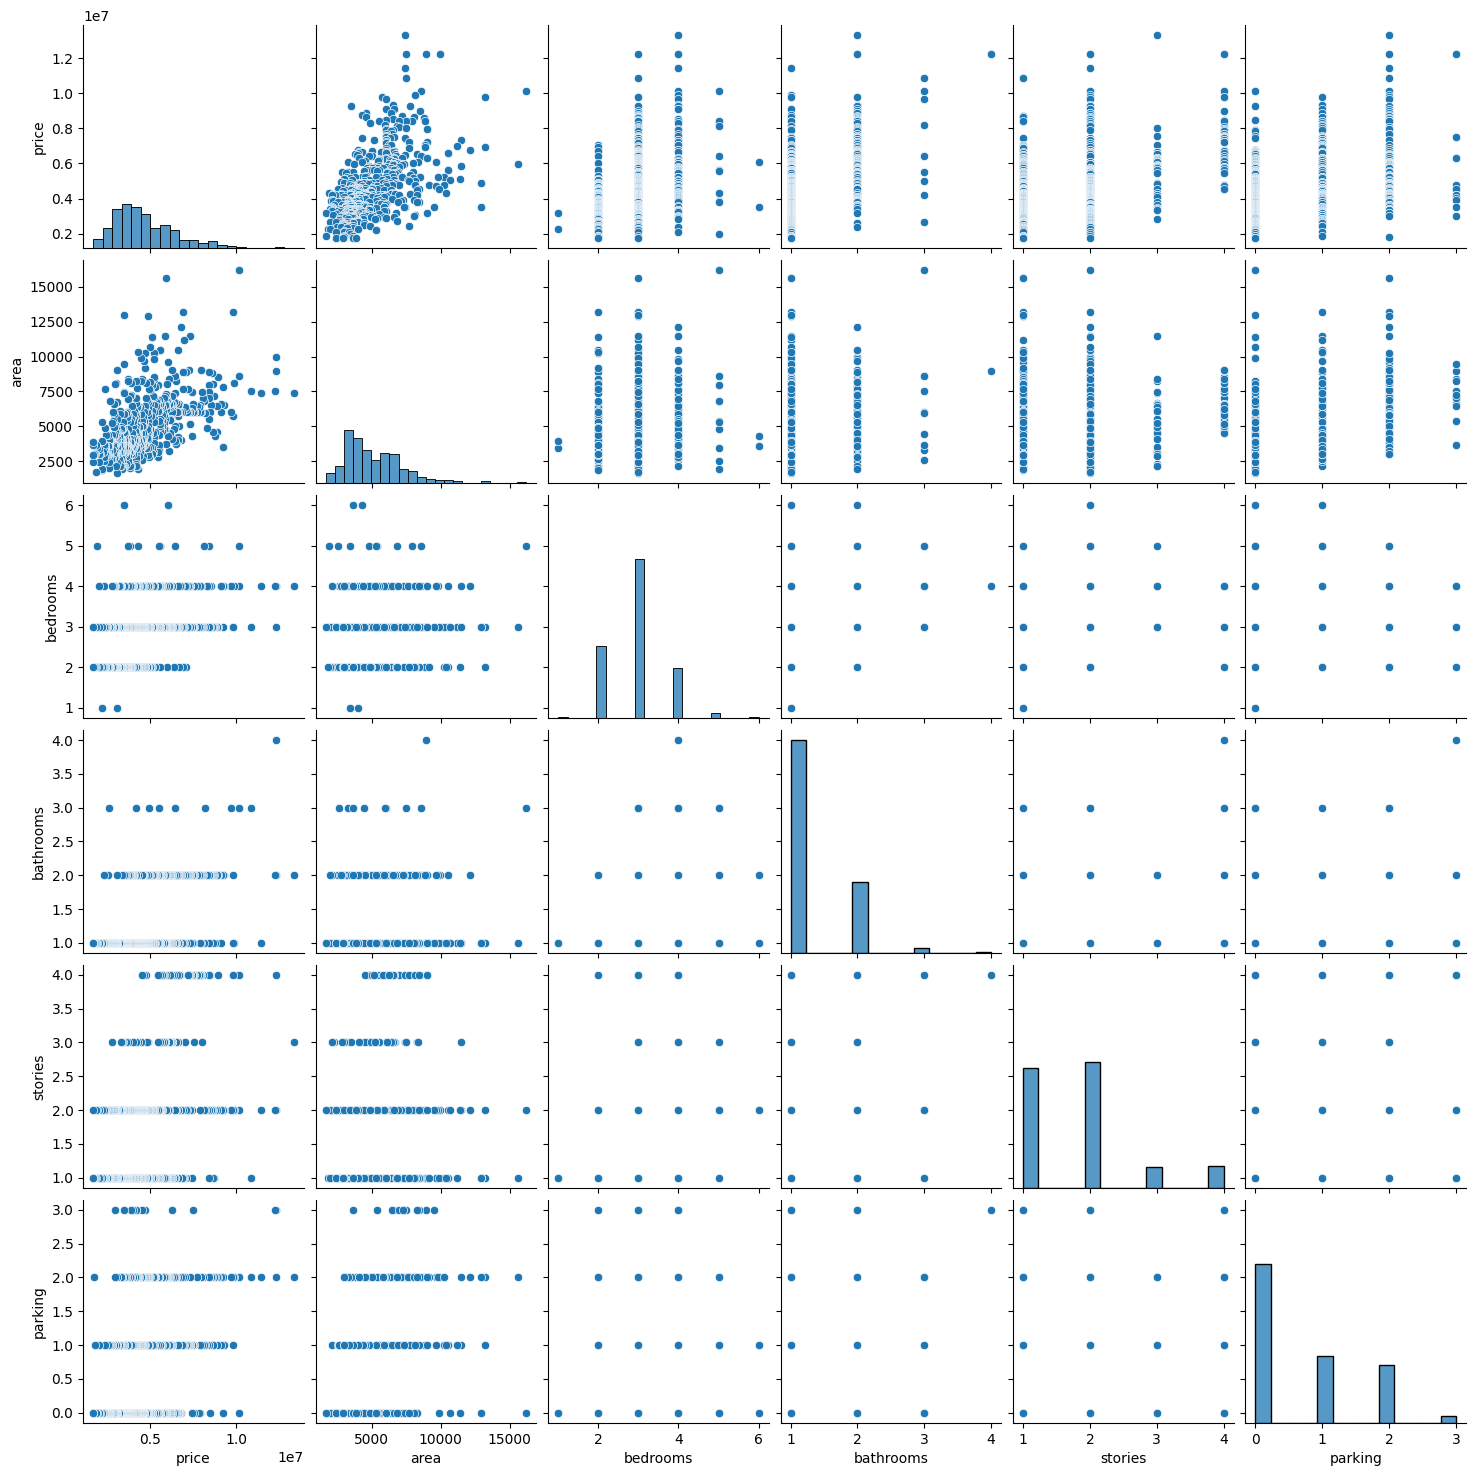

In [9]:
sns.pairplot(dataset)

In [10]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,:-1].values

In [11]:
print(x)

[[13300000 7420 4 ... 'yes' 2 'yes']
 [12250000 8960 4 ... 'yes' 3 'no']
 [12250000 9960 3 ... 'no' 2 'yes']
 ...
 [1750000 3620 2 ... 'no' 0 'no']
 [1750000 2910 3 ... 'no' 0 'no']
 [1750000 3850 3 ... 'no' 0 'no']]


In [12]:
print(y)

[[13300000 7420 4 ... 'yes' 2 'yes']
 [12250000 8960 4 ... 'yes' 3 'no']
 [12250000 9960 3 ... 'no' 2 'yes']
 ...
 [1750000 3620 2 ... 'no' 0 'no']
 [1750000 2910 3 ... 'no' 0 'no']
 [1750000 3850 3 ... 'no' 0 'no']]


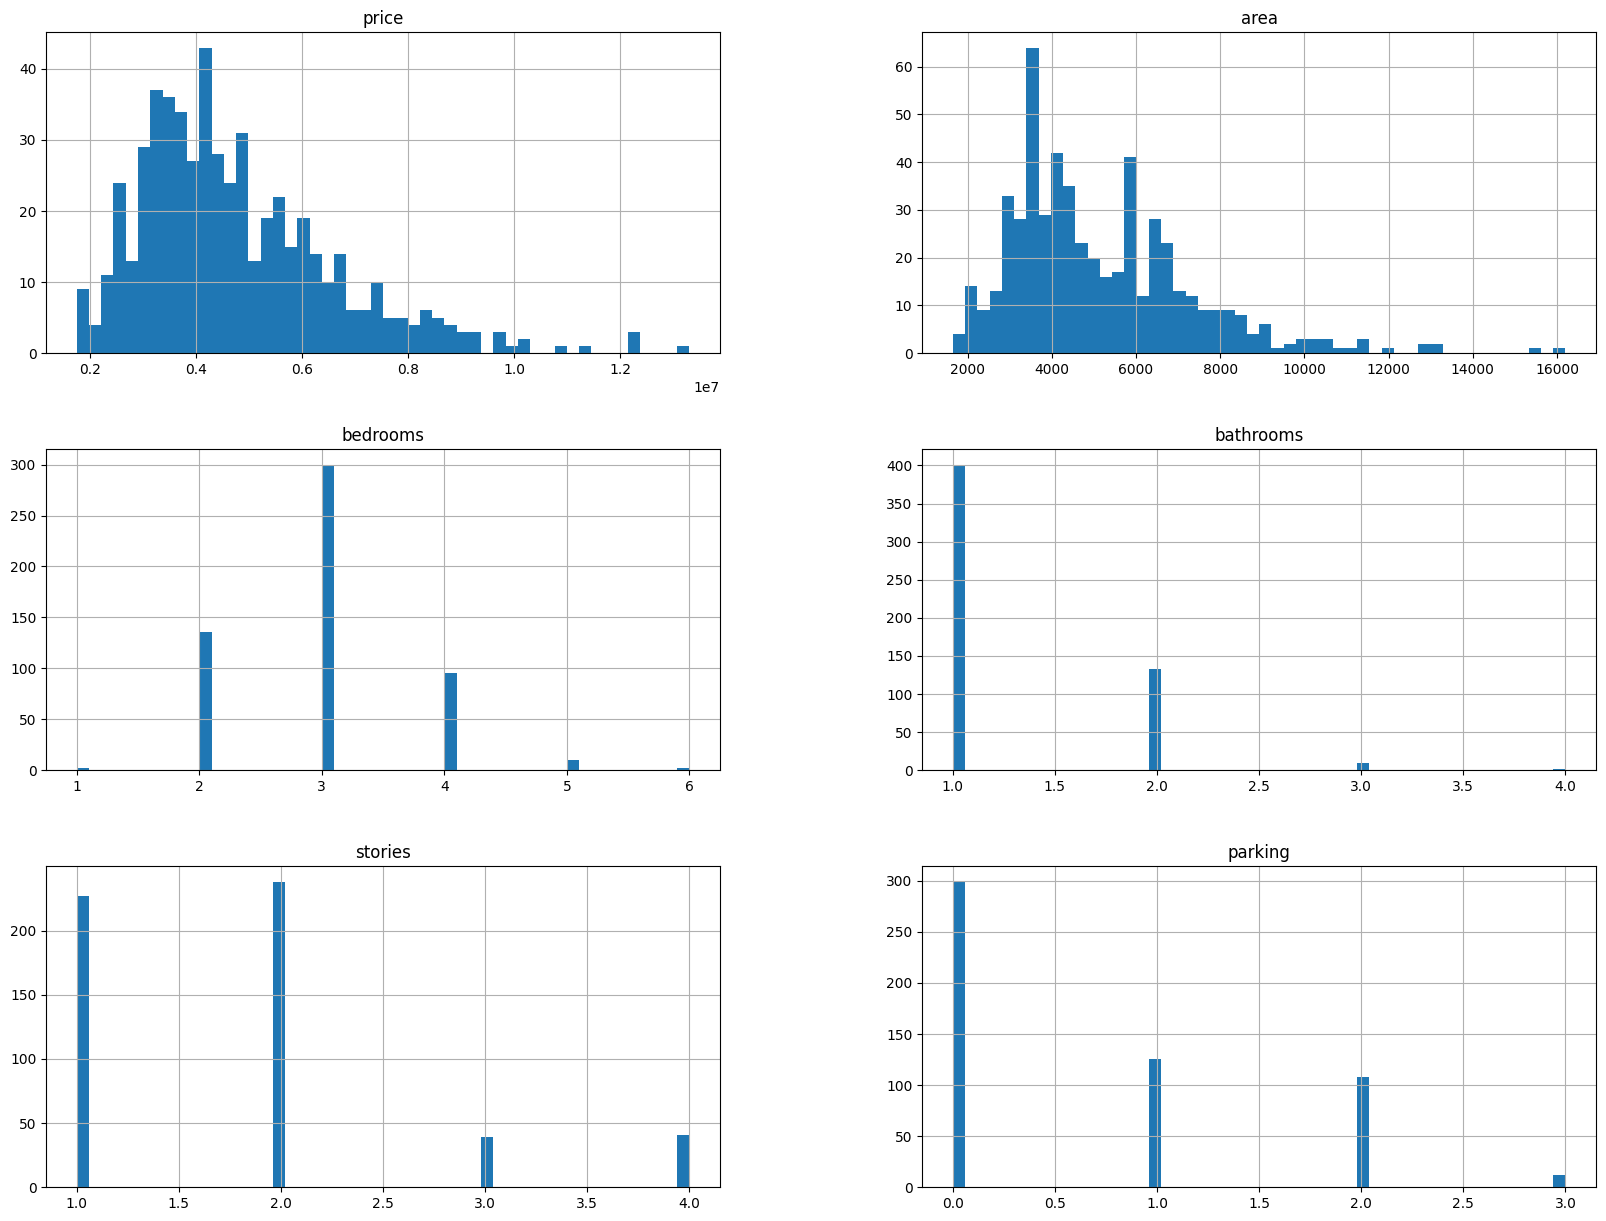

In [13]:
%matplotlib inline
dataset.hist(bins=50,figsize=(20,15))
plt.show()

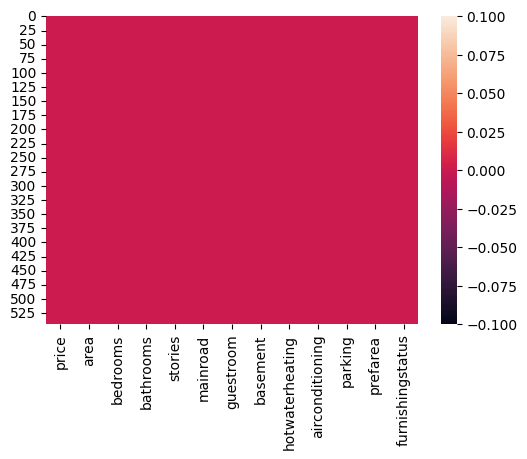

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def heat_map(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(dataset.isnull())
  return plt.show()

heat_map(dataset)

In [15]:
corr_matrix=dataset.corr()
print(corr_matrix)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


<ipython-input-15-1dd11c2d9120>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=dataset.corr()


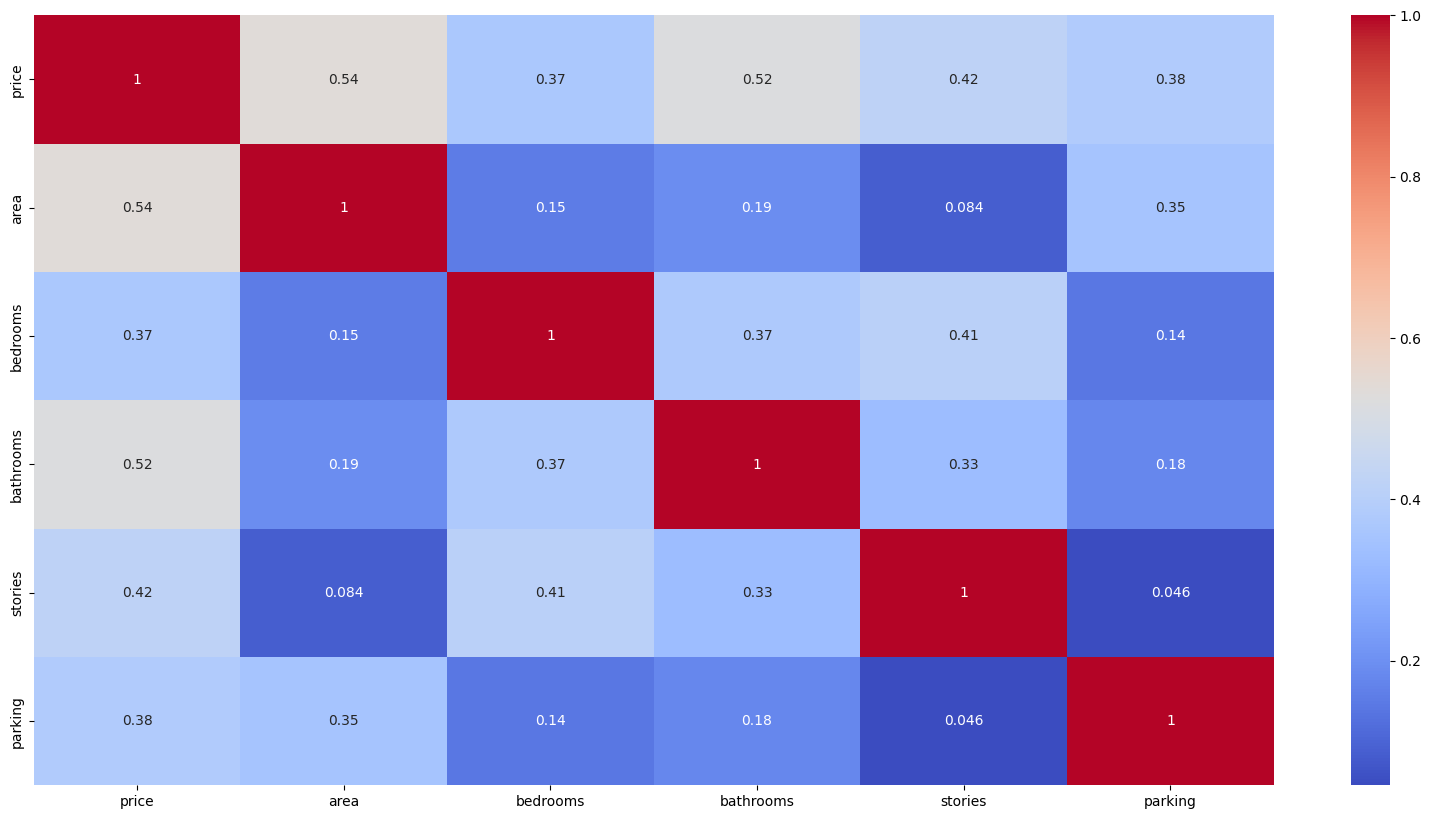

In [16]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [17]:
dataset['mainroad'] = dataset['mainroad'].map({'yes': 1, 'no': 0})

In [18]:
dataset['guestroom'] = dataset['guestroom'].map({'yes': 1, 'no': 0})

In [19]:
dataset['basement']=dataset['basement'].map({'yes':1,'no':0})

In [20]:
dataset['hotwaterheating']=dataset['hotwaterheating'].map({'yes':1,'no':0})

In [21]:
dataset['airconditioning']=dataset['airconditioning'].map({'yes':1,'no':0})

In [22]:
dataset['prefarea']=dataset['prefarea'].map({'yes':1,'no':0})

In [23]:
dataset['furnishingstatus']=dataset['furnishingstatus'].map({'furnished':1,'semi-furnished':0,'unfurnished':2})

In [24]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [25]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,:-1].values

In [26]:
x

array([[13300000,     7420,        4, ...,        1,        2,        1],
       [12250000,     8960,        4, ...,        1,        3,        0],
       [12250000,     9960,        3, ...,        0,        2,        1],
       ...,
       [ 1750000,     3620,        2, ...,        0,        0,        0],
       [ 1750000,     2910,        3, ...,        0,        0,        0],
       [ 1750000,     3850,        3, ...,        0,        0,        0]])

In [27]:
y

array([[13300000,     7420,        4, ...,        1,        2,        1],
       [12250000,     8960,        4, ...,        1,        3,        0],
       [12250000,     9960,        3, ...,        0,        2,        1],
       ...,
       [ 1750000,     3620,        2, ...,        0,        0,        0],
       [ 1750000,     2910,        3, ...,        0,        0,        0],
       [ 1750000,     3850,        3, ...,        0,        0,        0]])

In [28]:
 #classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)

    # cross-validation
    score = cross_val_score(model, x, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
classify(model, x, y)

Accuracy: 100.0
CV Score: 98.33333333333331
